#Pandas For EveryBody (Pa4E)

**What is Pandas?. How is it different from numpy?:**  
It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python. Pandas is often used in tandem with numerical computing tools like NumPy and SciPy and data visualization libraries like matplotlib.Difference between Numpy and pandas- pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.


**How to install pandas?** 

using anaconda: conda install pandas
using pip: pip install pandas

**How to use it?**

`In [1]: import pandas as pd`

Let us look at different types of pandas data structure

`Series`: A Series is a one-dimensional array-like object containing a sequence of values.

In [12]:
import pandas as pd

obj1 = pd.Series([1,2,3,4])
print(obj1)

0    1
1    2
2    3
3    4
dtype: int64


In [13]:
print(obj1.values)
print(obj1.index)

[1 2 3 4]
RangeIndex(start=0, stop=4, step=1)


Oftern it is desriable to create the series with an index 

In [14]:
obj2 = pd.Series([1,2,3,4], index=['a','b','c','d'])
print(obj2)

a    1
b    2
c    3
d    4
dtype: int64


In [15]:
print(obj2.values)
print(obj2.index)

[1 2 3 4]
Index(['a', 'b', 'c', 'd'], dtype='object')


How to use selction as in Numpy array

In [22]:
obj2['a']

obj2[['a','b','d']]

a    1
b    2
d    4
dtype: int64

some conditional operations that can be performed

In [23]:
obj2 > 2

a    False
b    False
c     True
d     True
dtype: bool

In [24]:
obj2[obj2 > 2]

c    3
d    4
dtype: int64

In [36]:
obj2 * 2 # This is not inplace


a    2
b    4
c    6
d    8
dtype: int64

In [37]:
obj2 # unless we explicitly assign it to the panda series

a    1
b    2
c    3
d    4
dtype: int64

In [39]:
'1' in obj2 # some logical operations Boolean

False

In [58]:
# let us pass dict to panda series

data = {'Delhi': 'DEL','Mumbai': 'BOM','Bangaluru':'BLR'}

ap = pd.Series(data, index = data)
print(ap)

Delhi        DEL
Mumbai       BOM
Bangaluru    BLR
dtype: object


In [62]:
# let says we want to add new airport to the existing series 
data['Hyderbad'] = 'HYD'
print(data) # New data added to dict

new_ap = pd.Series(data)
print(new_ap)

{'Delhi': 'DEL', 'Mumbai': 'BOM', 'Bangaluru': 'BLR', 'Hyderbad': 'HYD'}
Delhi        DEL
Mumbai       BOM
Bangaluru    BLR
Hyderbad     HYD
dtype: object


In [67]:
# let us look at the missing data 

sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
print(obj3)


Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


In [69]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata,index = states)

print(obj4)

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


In [70]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [71]:
# let us see what happens if we add two series obj3 and obj4 that has missing value

obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

## Now let us look at pandas Data Frame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns,each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index. There are two ways to construct a data frame. (1) Dict (2) Numpy

In [73]:
# let us create a simple dataframe

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
         'year': [2000, 2001, 2002, 2001, 2002, 2003],
         'pop' : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

df = pd.DataFrame(data)


In [74]:
# let us see what it looks like 

df
# another way is to use df.head() this displays the first 5 rows. similarly, df.tail() displays the last 5 rows

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [75]:
# just like index that helps to manage the rows in series, columns helps to manage the cols in the dataframe

pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [76]:
# we can pass in the index as we did in series
zip_code = {'Ohio': 45874,'Nevada':44849}
pd.DataFrame(data, columns=['year', 'state', 'pop'], index = zip_code)

ValueError: Shape of passed values is (6, 3), indices imply (2, 3)

In [80]:
# we can pass in the index as we did in series
zip_code = [45874, 45874,45874,44849,44849,44849]
df = pd.DataFrame(data, columns=['year', 'state', 'pop'], index = zip_code)
df

,year,state,pop
45874,2000,Ohio,1.5
45874,2001,Ohio,1.7
45874,2002,Ohio,3.6
44849,2001,Nevada,2.4
44849,2002,Nevada,2.9
44849,2003,Nevada,3.2


In [100]:
# can we slice a particular column?

df[['year','pop']]
df.state


45874      Ohio
45874      Ohio
45874      Ohio
44849    Nevada
44849    Nevada
44849    Nevada
Name: state, dtype: object

In [91]:
# can we slice some rows?
df.head(2)

,year,state,pop
45874,2000,Ohio,1.5
45874,2001,Ohio,1.7


In [103]:
df1 = df

df1['debt'] = None
df1

,year,state,pop,debt
45874,2000,Ohio,1.5,None
45874,2001,Ohio,1.7,None
45874,2002,Ohio,3.6,None
44849,2001,Nevada,2.4,None
44849,2002,Nevada,2.9,None
44849,2003,Nevada,3.2,None


In [105]:
df1['debt'] = 12.5
df1

,year,state,pop,debt
45874,2000,Ohio,1.5,12.5
45874,2001,Ohio,1.7,12.5
45874,2002,Ohio,3.6,12.5
44849,2001,Nevada,2.4,12.5
44849,2002,Nevada,2.9,12.5
44849,2003,Nevada,3.2,12.5


In [109]:
import numpy as np
df1['debt'] = np.arange(6.)
df1

,year,state,pop,debt
45874,2000,Ohio,1.5,0.0
45874,2001,Ohio,1.7,1.0
45874,2002,Ohio,3.6,2.0
44849,2001,Nevada,2.4,3.0
44849,2002,Nevada,2.9,4.0
44849,2003,Nevada,3.2,5.0


In [110]:
df.describe()

,year,pop,debt
count,6.000000,6.000000,6.000000
mean,2001.500000,2.550000,2.500000
std,1.048809,0.836062,1.870829
min,2000.000000,1.500000,0.000000
25%,2001.000000,1.875000,1.250000
50%,2001.500000,2.650000,2.500000
75%,2002.000000,3.125000,3.750000
max,2003.000000,3.600000,5.000000


## Let us look at some real data

In [114]:
# let us read the data from a file (usually the csv file)

iris = pd.read_csv('C:\\Users\\anand\\Downloads\\iris.csv') # iris is a flower data that constains 4 features.
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [115]:
iris.describe() # basic stats

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [116]:
iris.info() # basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [119]:
# let us see only the two features sepal length and sepal width

feat = iris[['sepal.length','sepal.width']]
feat.head()

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


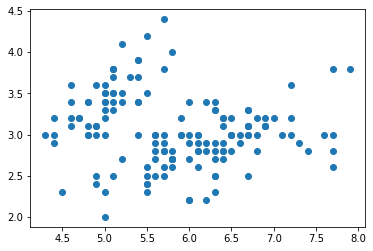

In [129]:
# let us do some plotting to get a handson on the data

import matplotlib.pyplot as plt
plt.scatter(feat['sepal.length'],feat['sepal.width'])